In [1]:
# !pip install geocoder
import tweepy

from tweepy.streaming import StreamListener
from tweepy import OAuthHandler 
from tweepy import Stream
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Secret Credentials 
ACCESS_TOKEN = "500435442-ZsyX0WGAgAsiK3mPMwCLVZgXaM4mPeLpOZHh46Uc"
ACCESS_TOKEN_SECRET = "tI6pbzVsXWzNmfUEC07by6ZpJc5d58vu0sKxovxuDQEoY"
CONSUMER_KEY = "zazEfoGYmcJp8IZCQZYeleORe"
CONSUMER_SECRET = "JtTfz6C4WaCNZkzmn02U4GkOoilCyiIVKFFknuLgWD51MeVySm"

In [3]:
auth=OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN,ACCESS_TOKEN_SECRET)
api=tweepy.API(auth)

In [4]:
tweets=[]
retweet=[]
likes=[]

In [36]:
l=l[:5]
l

['ndtv', 'PragyaLive', 'DeepalTrevedie', 'ndtv', 'TheJohnAbraham']

In [23]:
#input from website 
user_input='CA'
userx=l


In [37]:
# a=tweepy.Cursor(api.user_timeline,id=userx).items(200)
# a=list(a)
data=[]
for i in range(len(userx)):
    searched_tweets = [status for status in tweepy.Cursor(api.user_timeline,id=userx[i]).items(200)]
    tweets=[]
    for i in searched_tweets:
        tweets.append(i.text)
    data.append(tweets)
    

In [1]:

# a=tweepy.Cursor(api.user_timeline,id=userx).items(200)
# a=list(a)
# a

#### Query analysis


In [5]:
ut="#coronavirus"

In [6]:
popular_tweets = api.search(q=ut, result_type='popular')

In [33]:
# popular_tweets[1]

In [21]:
l=[]
for j in range(len(popular_tweets)):
        print("\n   "+popular_tweets[j].user.profile_image_url+"  "+popular_tweets[j].user.name + "     Retweet_Count:   "+str(popular_tweets[j].retweet_count))
        print("\n"+popular_tweets[j].text)
        l.append(popular_tweets[j].user.screen_name)
#      l=[cat("\n"+popular_tweets[j].text,"\nBy--  "+popular_tweets[j].user.name,'RetweetCount:'+popular_tweets[j].ret]

        print('----------------------------------------------------')



   http://pbs.twimg.com/profile_images/570440108424171520/QuGYd7jH_normal.png  NDTV     Retweet_Count:   1328

#coronavirus https://t.co/QAu4ApQIsA
----------------------------------------------------

   http://pbs.twimg.com/profile_images/1380172619140325380/0OVy8obk_normal.jpg  Pragya Mishra     Retweet_Count:   1844

कोरोना के कारण बीच में ही अलविदा कह गए उत्तर प्रदेश के मेरे पत्रकार साथी अब लिस्ट बन गए हैं...RIP...श्रद्धांजली...… https://t.co/AEmwgUuV2S
----------------------------------------------------

   http://pbs.twimg.com/profile_images/1351430168456306691/Fq-h9vMA_normal.jpg  Deepal.‏‎‎Trivedi     Retweet_Count:   333

No, don't call it #business_sense. It is moral corruption &amp; lack of conscience of the average #Gujarati soul. A fac… https://t.co/rUdJaxvvY7
----------------------------------------------------

   http://pbs.twimg.com/profile_images/570440108424171520/QuGYd7jH_normal.png  NDTV     Retweet_Count:   238

#Coronavirus https://t.co/jPFF2Sqkc4
------------

In [20]:
popular_tweets[1].user.screen_name

'PragyaLive'

In [7]:
# Twitter_df2=pd.DataFrame({'tweets':tweets,'likes':likes,'retweet':retweet})
# Twitter_df2

In [25]:



#LOAD MODEL
loaded_vec = CountVectorizer(vocabulary=pickle.load(open("count_vector.pkl", "rb")))
loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("NEW_softmax.pkl","rb"))




In [26]:
news_category=[]

In [38]:
for i in range(len(data)):
    for j in range(len(data[i])):
        X_new_counts = loaded_vec.transform([data[i][j]])
        X_new_tfidf = loaded_tfidf.transform(X_new_counts)
        predicted = loaded_model.predict(X_new_tfidf)
        news_category.append(predicted)





In [28]:
from itertools import islice

def chunk(it, size):
    it = iter(it)
    return iter(lambda: tuple(islice(it, size)), ())



In [39]:
x=[]
for i in range(len(news_category)):
    x.append(news_category[i][0])
    
cumulative_count=[]
set_x=list(set(x))

for j in range(len(set_x)):
    cumulative_count.append(x.count(set_x[j]))


# c1=x[0:200]
# c2=x[200:400]
# c3=x[400:600]

In [30]:
import numpy as np 
N_c=list(chunk(x, 200))


In [14]:
# set_x=list(set(x))
# set_x_count1=[]
# set_x_count2=[]
# set_x_count3=[]

In [40]:
count_y=[]

for i in range(len(N_c)):
    count=[]
    for j in range(len(set_x)):
        count.append(N_c[i].count(set_x[j]))
    count_y.append(count)

In [16]:
# list1=[]
# for i in range(len(count_y)):
#     list1.append([userx[i],count_y[i]])
# df=pd.DataFrame(list1,columns=['Name','Values'])

In [17]:
# Tweet_Uni=dict(zip(set_x,set_x_count))
# count1=list(Tweet_Uni.values())
# size1=[]
# for i in count1:
#     size1.append(i)

# colours=[]
# c=120
# for i in range(len(count1)):
#     c=c+2
#     colours.append(c)



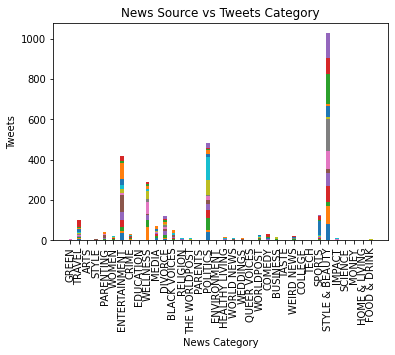

In [41]:
w=0.4

for i in range(len(count_y)):
    plt.bar(set_x, count_y[i],w,bottom = np.sum(count_y[:i], axis = 0))
    plt.xlabel('News Category')
    plt.ylabel('Tweets')
    plt.title('News Source vs Tweets Category')
    plt.xticks(rotation=90)
plt.show()

No handles with labels found to put in legend.


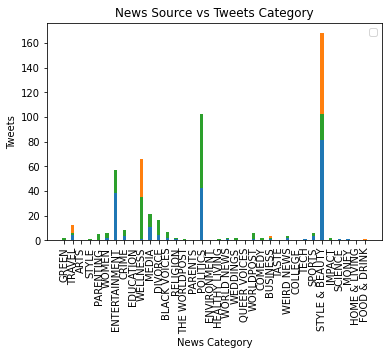

In [42]:
import matplotlib.pyplot as plt


plt.bar(set_x,count_y[0],w)
plt.bar(set_x,count_y[1],w,bottom=count_y[0])
plt.bar(set_x,count_y[2],w,bottom=count_y[0])

plt.xlabel('News Category')
plt.ylabel('Tweets')
plt.title('News Source vs Tweets Category')
plt.xticks(rotation=90)
plt.legend()
plt.show()

No handles with labels found to put in legend.


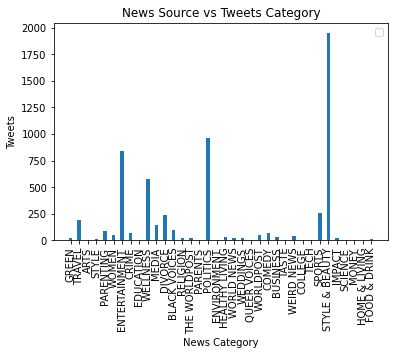

In [43]:
plt.bar(set_x,cumulative_count,w)
plt.xlabel('News Category')
plt.ylabel('Tweets')
plt.title('News Source vs Tweets Category')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [21]:
# # !pip install plotly
# import plotly.graph_objects as go

# fig1 = go.Figure(data=[go.Scatter(
#     x=set_x,
#     y=cumulative_count,
#     mode='markers',
#     marker=dict(
#         color=colours,
#         size=size1,
#         showscale=True
#         )
# )])
# fig1.show()

# bar1=[set_x,set_x_count]

In [22]:
# # !pip install plotly
# import plotly.graph_objects as go

# fig2 = go.Figure(data=[go.Scatter(
#     x=set_x,
#     y=set_x_count,
#     mode='markers',
#     marker=dict(
#         color=colours,
#         size=size1,
#         showscale=True
#         )
# )])
# fig2.show()

# bar2=[set_x,set_x_count]

In [23]:
# # !pip install seaborn
# import seaborn as sns
# import matplotlib.pyplot as plt
# import matplotlib.pyplot as figure
# df1=pd.DataFrame({'x':bar1[0],'y':bar1[1]})
# df2=pd.DataFrame({'x':bar2[0],'y':bar2[1]})

# df1['hue']='Skynews'
# df2['hue']='ABC'

# combined=pd.concat([df1,df2])

# a4_dims = (11.7, 8.27)
# fig, ax = plt.subplots(figsize=a4_dims)
# g=sns.barplot(ax=ax,x='x',y='y',data=combined,hue='hue')
# plt.setp(g.get_xticklabels(), rotation=90)
# plt.show()


In [24]:
# figx.show()

In [25]:
# !pip install -U kaleido
# !conda install psutil

In [26]:
# fig.write_image("yourfile.png") 

In [27]:
import json
data = {}
df=pd.DataFrame()
df['category']=set_x

if user_input=='CA':
    data=dict(zip(set_x,cumulative_count))
    json_data = json.dumps(data)
else:
    for i in range(len(count_y)):
        df['value_'+format(i)]=count_y[i]
    json_data=df.to_json(orient='records', lines=True)




In [28]:
# for i in range(len(count_y)):
#     data=dict(zip(set_x,count_y[i]))


In [29]:
# df=pd.DataFrame()
# df['category']=set_x
# df['cat_'+format(i)]=count_y[0]
# df

In [30]:
# # import matplotlib.pyplot as plt
# # plt.scatter(set_x, set_x_count, s=size1,c=colours

# i=1
# s='cat_'+format({i})
# s

In [31]:
# plt.to_json('json_file.json')

In [32]:
# plt.scatter(
#     x = set_x, 
#     y = set_x_count, 
#     s=size1, 
#     c=colours, 
#     cmap="Accent", 
#     alpha=0.6, 
#     edgecolors="white", 
#     linewidth=2);
 
# plt.xlabel("News Category")
# plt.ylabel("Frequency")
# plt.title("TWITTER ANALYSIS")
# plt.ylim(0,200)



In [33]:
# plt.savefig(fname='fig2.png')


### NEW EXPLORATION -- whats trending

In [5]:
import sys
import geocoder as g
# Available Locations
places = api.geo_search(query="AUSTRALIA", granularity="country")
place_id = places[0].id

available_loc = api.trends_available()
    # Trends for Specific Country
loc = sys.argv[1]     # location as argument variable 
g.lat=-37.8136
g.lng=144.9631
closest_loc = api.trends_closest(g.lat, g.lng)
trends = api.trends_place(closest_loc[0]['woeid'])


In [19]:
# trends2[2]['name']

In [6]:
trends2=trends[0]['trends'][:10]
d={}
for i in range(len(trends2)):
    print('####################################')
    string="#"+str(trends2[i]['name'])
    print(string)
    
    popular_tweets=[]
    popular_tweets = api.search(q=trends2[i]['name'], result_type='popular')
    for j in range(len(popular_tweets)):
        print("\n"+popular_tweets[j].text)
        print("\nBy--  "+popular_tweets[j].user.name)
#        l=[cat("\n"+popular_tweets[j].text,"\nBy--  "+popular_tweets[j].user.name,'RetweetCount:'+popular_tweets[j].ret]

    print('----------------------------------------------------')


####################################
##QandA

Australia is quite good at constructing large centres where we lock up people we don’t want.
Surely we can accomoda… https://t.co/yLTztbCSV4

By--  Julian Burnside

Jess Hill's landmark documentary series #SeeWhatYouMadeMeDo, which asks what needs to be done to keep women and chi… https://t.co/H78gLcpfm5

By--  QandA

"That the fossil fuel industry managed to turn global warming into a political issue... might have been tactically… https://t.co/NpDx0gQJHW

By--  QandA

Geraldine Bilston shared her story of physical and emotional abuse with Q+A last year. She is still fighting for th… https://t.co/DcOqiFHtI3

By--  QandA

Australian citizens should be allowed back. 
What about home detention enforced by ankle bracelets, if necessary? #qanda

By--  Julian Burnside

Bridget McKenzie was the Minister for Biosecurity when we (MUA) warned about ports and Biosecurity ONE MONTH before… https://t.co/VwrfWk6ILu

By--  Mich-Elle Myers

If we had large


LOVE 💗 https://t.co/tvCNY4WznM

By--  B3N

🐶💕⁠ Serious side eye on the DLR 👀⁠

Thanks for sharing, Benji! https://t.co/l3SAfzQcfR

By--  Transport for London 🚶🏼‍♀️🚴🏼‍♀️

Ho paura di non essere all’altezza dei miei sogni e delle mie ambizioni, ma ciò nonostante ho fatto la mia scelta:… https://t.co/M1hWEEGQ7L

By--  B3N

Popstar or college student? https://t.co/rRxgFF6QJ0

By--  B3N

Brasstown Coffee Co. (but only if Victor and Benji are working) https://t.co/GBemi0Ntzh https://t.co/1JqfisONMM

By--  Love, Victor

Happy Twitter Independence Day Tanzania: 29/4/2021

Finally, 7 months later, Twitter unblocked in Tanzania. 🎉

By--  Benjamin Fernandes 🇹🇿

The right people won’t give up on you.

By--  Benjamin Fernandes 🇹🇿

Fintech in Africa: 

Product Vs. Compliance paperwork https://t.co/Nbmzg5EQjm

By--  Benjamin Fernandes 🇹🇿

Support Aboriginal business.
This is my cousin Benji's Rodna Cultural Tours
If you're travelling Finke River, Herma… https://t.co/Dw0Bnwf4ha

By--  @Sue-Anne Hunte

In [13]:
print(trends2[3]['tweet_volume'])

None


In [121]:
n=[]
tv=[]
for i in range(len(trends2)):
    n.append("#"+str(trends2[i]['name']))
    if trends2[i]['tweet_volume']==None:
        trends2[i]['tweet_volume']=0
    tv.append(int(trends2[i]['tweet_volume']))
trending_data=dict(zip(n,tv))

No handles with labels found to put in legend.


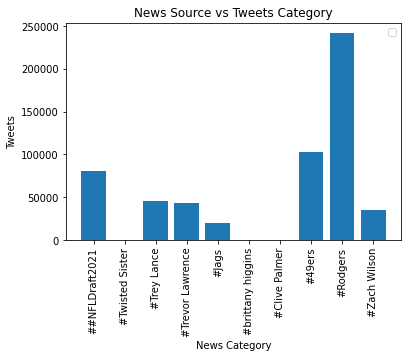

In [122]:
plt.bar(n,tv)
plt.xlabel('News Category')
plt.ylabel('Tweets')
plt.title('News Source vs Tweets Category')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [123]:
count1=tv
size1=[]
for i in count1:
    size1.append(i/1000)

colours=[]
c=120
for i in range(len(count1)):
    c=c+2
    colours.append(c)



In [124]:
# !pip install plotly
import plotly.graph_objects as go

fig1 = go.Figure(data=[go.Scatter(
    x=n,
    y=tv,
    mode='markers',
    marker=dict(
        color=colours,
        size=size1,
        showscale=True
        )
)])
fig1.show()

bar1=[n,tv]

In [ ]:
# # !pip install plotly
# import plotly.graph_objects as go

# fig1 = go.Figure(data=[go.Scatter(
#     x=set_x,
#     y=cumulative_count,
#     mode='markers',
#     marker=dict(
#         color=colours,
#         size=size1,
#         showscale=True
#         )
# )])
# fig1.show()

# bar1=[set_x,set_x_count]

In [128]:
#Export json
import json
trending_data=dict(zip(n,tv))
json_trending_data = json.dumps(trending_data)
